In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set visualization style
sns.set(style="whitegrid")


In [2]:
# Load the dataset
file_path = '/home/kali/Desktop/git/Solar-Radiation-Measurement/data/benin-malanville.csv'
data = pd.read_csv(file_path)

# Display basic information about the dataset
data.info()

# Display the first few rows
data.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525600 entries, 0 to 525599
Data columns (total 19 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Timestamp      525600 non-null  object 
 1   GHI            525600 non-null  float64
 2   DNI            525600 non-null  float64
 3   DHI            525600 non-null  float64
 4   ModA           525600 non-null  float64
 5   ModB           525600 non-null  float64
 6   Tamb           525600 non-null  float64
 7   RH             525600 non-null  float64
 8   WS             525600 non-null  float64
 9   WSgust         525600 non-null  float64
 10  WSstdev        525600 non-null  float64
 11  WD             525600 non-null  float64
 12  WDstdev        525600 non-null  float64
 13  BP             525600 non-null  int64  
 14  Cleaning       525600 non-null  int64  
 15  Precipitation  525600 non-null  float64
 16  TModA          525600 non-null  float64
 17  TModB          525600 non-nul

,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
0,2021-08-09 00:01,-1.2,-0.2,-1.1,0.0,0.0,26.2,93.4,0.0,0.4,0.1,122.1,0.0,998,0,0.0,26.3,26.2,NaN
1,2021-08-09 00:02,-1.1,-0.2,-1.1,0.0,0.0,26.2,93.6,0.0,0.0,0.0,0.0,0.0,998,0,0.0,26.3,26.2,NaN
2,2021-08-09 00:03,-1.1,-0.2,-1.1,0.0,0.0,26.2,93.7,0.3,1.1,0.5,124.6,1.5,997,0,0.0,26.4,26.2,NaN
3,2021-08-09 00:04,-1.1,-0.1,-1.0,0.0,0.0,26.2,93.3,0.2,0.7,0.4,120.3,1.3,997,0,0.0,26.4,26.3,NaN
4,2021-08-09 00:05,-1.0,-0.1,-1.0,0.0,0.0,26.2,93.3,0.1,0.7,0.3,113.2,1.0,997,0,0.0,26.4,26.3,NaN


In [3]:
# Summary statistics for numeric columns
summary_stats = data.describe()
summary_stats


,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
count,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,0.0
mean,240.559452,167.187516,115.358961,236.589496,228.883576,28.179683,54.487969,2.121113,2.809195,0.473390,153.435172,8.582407,994.197199,0.000923,0.001905,35.246026,32.471736,NaN
std,331.131327,261.710501,158.691074,326.894859,316.536515,5.924297,28.073069,1.603466,2.029120,0.273395,102.332842,6.385864,2.474993,0.030363,0.037115,14.807258,12.348743,NaN
min,-12.900000,-7.800000,-12.600000,0.000000,0.000000,11.000000,2.100000,0.000000,0.000000,0.000000,0.000000,0.000000,985.000000,0.000000,0.000000,9.000000,8.100000,NaN
25%,-2.000000,-0.500000,-2.100000,0.000000,0.000000,24.200000,28.800000,1.000000,1.300000,0.400000,59.000000,3.700000,993.000000,0.000000,0.000000,24.200000,23.600000,NaN
50%,1.800000,-0.100000,1.600000,4.500000,4.300000,28.000000,55.100000,1.900000,2.600000,0.500000,181.000000,8.600000,994.000000,0.000000,0.000000,30.000000,28.900000,NaN
75%,483.400000,314.200000,216.300000,463.700000,447.900000,32.300000,80.100000,3.100000,4.100000,0.600000,235.100000,12.300000,996.000000,0.000000,0.000000,46.900000,41.500000,NaN
max,1413.000000,952.300000,759.200000,1342.300000,1342.300000,43.800000,100.000000,19.500000,26.600000,4.200000,360.000000,99.400000,1003.000000,1.000000,2.500000,81.000000,72.500000,NaN


In [4]:
# Check for missing values
missing_values = data.isnull().sum()
print("Missing Values:\n", missing_values)

# Check for negative values in GHI, DNI, DHI
negative_values = {
    "GHI": (data['GHI'] < 0).sum(),
    "DNI": (data['DNI'] < 0).sum(),
    "DHI": (data['DHI'] < 0).sum(),
}
print("\nNegative Values:\n", negative_values)


Missing Values:
 Timestamp             0
GHI                   0
DNI                   0
DHI                   0
ModA                  0
ModB                  0
Tamb                  0
RH                    0
WS                    0
WSgust                0
WSstdev               0
WD                    0
WDstdev               0
BP                    0
Cleaning              0
Precipitation         0
TModA                 0
TModB                 0
Comments         525600
dtype: int64

Negative Values:
 {'GHI': np.int64(258847), 'DNI': np.int64(275987), 'DHI': np.int64(259182)}


In [5]:
# Replace negative values in GHI, DNI, DHI with 0
data['GHI'] = data['GHI'].apply(lambda x: max(x, 0))
data['DNI'] = data['DNI'].apply(lambda x: max(x, 0))
data['DHI'] = data['DHI'].apply(lambda x: max(x, 0))

# Drop the Comments column
data = data.drop(columns=['Comments'])

# Verify the changes
data.describe()


,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB
count,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000
mean,241.958821,167.441866,116.993033,236.589496,228.883576,28.179683,54.487969,2.121113,2.809195,0.473390,153.435172,8.582407,994.197199,0.000923,0.001905,35.246026,32.471736
std,330.101787,261.547532,157.463619,326.894859,316.536515,5.924297,28.073069,1.603466,2.029120,0.273395,102.332842,6.385864,2.474993,0.030363,0.037115,14.807258,12.348743
min,0.000000,0.000000,0.000000,0.000000,0.000000,11.000000,2.100000,0.000000,0.000000,0.000000,0.000000,0.000000,985.000000,0.000000,0.000000,9.000000,8.100000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,24.200000,28.800000,1.000000,1.300000,0.400000,59.000000,3.700000,993.000000,0.000000,0.000000,24.200000,23.600000
50%,1.800000,0.000000,1.600000,4.500000,4.300000,28.000000,55.100000,1.900000,2.600000,0.500000,181.000000,8.600000,994.000000,0.000000,0.000000,30.000000,28.900000
75%,483.400000,314.200000,216.300000,463.700000,447.900000,32.300000,80.100000,3.100000,4.100000,0.600000,235.100000,12.300000,996.000000,0.000000,0.000000,46.900000,41.500000
max,1413.000000,952.300000,759.200000,1342.300000,1342.300000,43.800000,100.000000,19.500000,26.600000,4.200000,360.000000,99.400000,1003.000000,1.000000,2.500000,81.000000,72.500000


/home/kali/Desktop/git/Solar-Radiation-Measurement/.venv/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


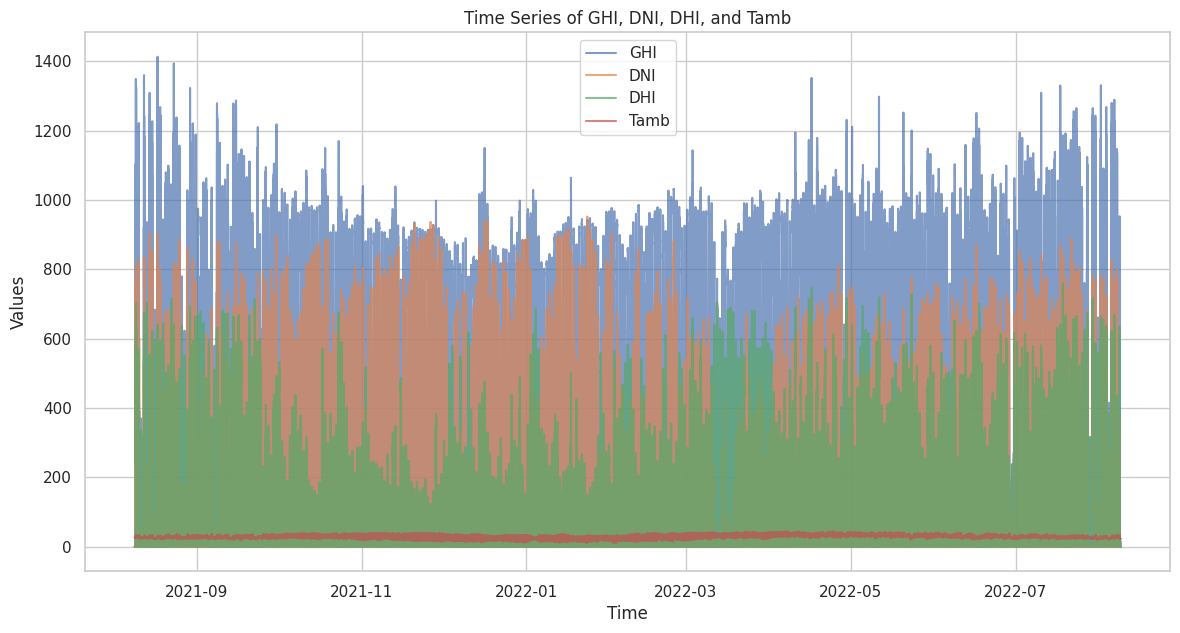

In [6]:
# Convert Timestamp to datetime
data['Timestamp'] = pd.to_datetime(data['Timestamp'])

# Plotting GHI, DNI, DHI, and Tamb over time
plt.figure(figsize=(14, 7))
plt.plot(data['Timestamp'], data['GHI'], label='GHI', alpha=0.7)
plt.plot(data['Timestamp'], data['DNI'], label='DNI', alpha=0.7)
plt.plot(data['Timestamp'], data['DHI'], label='DHI', alpha=0.7)
plt.plot(data['Timestamp'], data['Tamb'], label='Tamb', alpha=0.7)
plt.xlabel('Time')
plt.ylabel('Values')
plt.title('Time Series of GHI, DNI, DHI, and Tamb')
plt.legend()
plt.show()


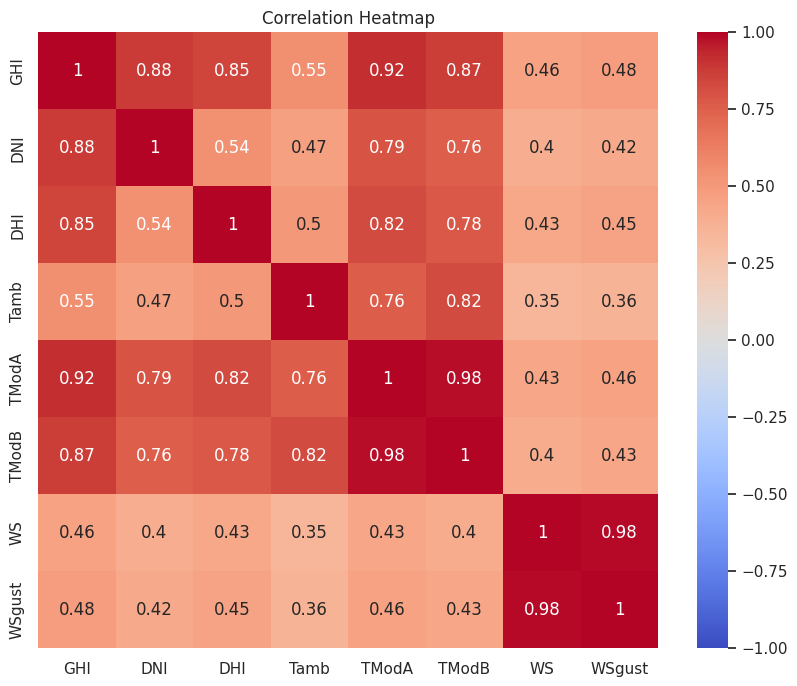

In [7]:
# Correlation heatmap
plt.figure(figsize=(10, 8))
corr = data[['GHI', 'DNI', 'DHI', 'Tamb', 'TModA', 'TModB', 'WS', 'WSgust']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.show()


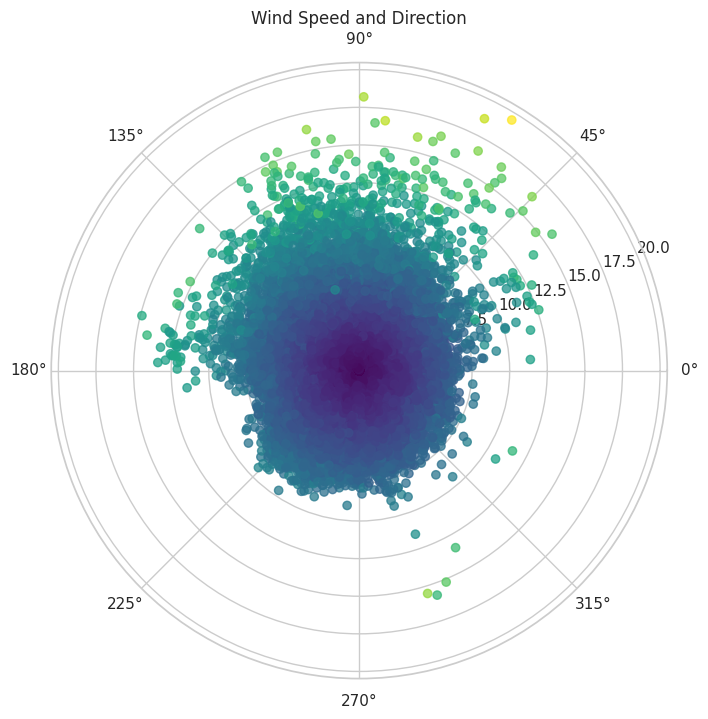

In [8]:
# Polar plot for wind direction and speed
plt.figure(figsize=(8, 8))
ax = plt.subplot(111, polar=True)
ax.scatter(data['WD'] * (3.14/180), data['WS'], c=data['WSgust'], cmap='viridis', alpha=0.75)
plt.title('Wind Speed and Direction')
plt.show()


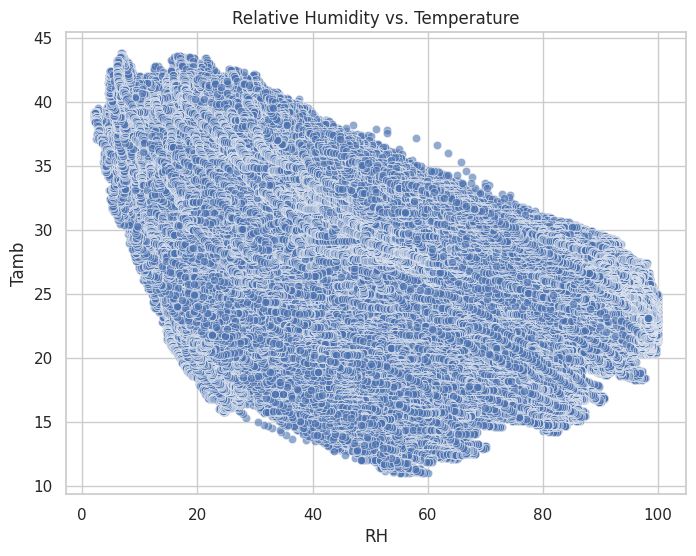

In [9]:
# Scatter plot: RH vs. Tamb
plt.figure(figsize=(8, 6))
sns.scatterplot(x='RH', y='Tamb', data=data, alpha=0.6)
plt.title('Relative Humidity vs. Temperature')
plt.show()


In [11]:
# Z-Score Analysis
from scipy.stats import zscore

# Calculate Z-scores for GHI
data['GHI_zscore'] = zscore(data['GHI'])

# Identify outliers
outliers = data[data['GHI_zscore'].abs() > 3]
print("Outliers in GHI based on Z-scores:\n", outliers[['Timestamp', 'GHI', 'GHI_zscore']])


Outliers in GHI based on Z-scores:
                  Timestamp     GHI  GHI_zscore
671    2021-08-09 11:12:00  1274.0    3.126436
674    2021-08-09 11:15:00  1349.0    3.353639
676    2021-08-09 11:17:00  1334.0    3.308198
849    2021-08-09 14:10:00  1253.0    3.062819
850    2021-08-09 14:11:00  1324.0    3.277905
...                    ...     ...         ...
517777 2022-08-03 13:38:00  1268.0    3.108260
520659 2022-08-05 13:40:00  1280.0    3.144612
520696 2022-08-05 14:17:00  1244.0    3.035555
522074 2022-08-06 13:15:00  1262.0    3.090084
522075 2022-08-06 13:16:00  1289.0    3.171877

[90 rows x 3 columns]


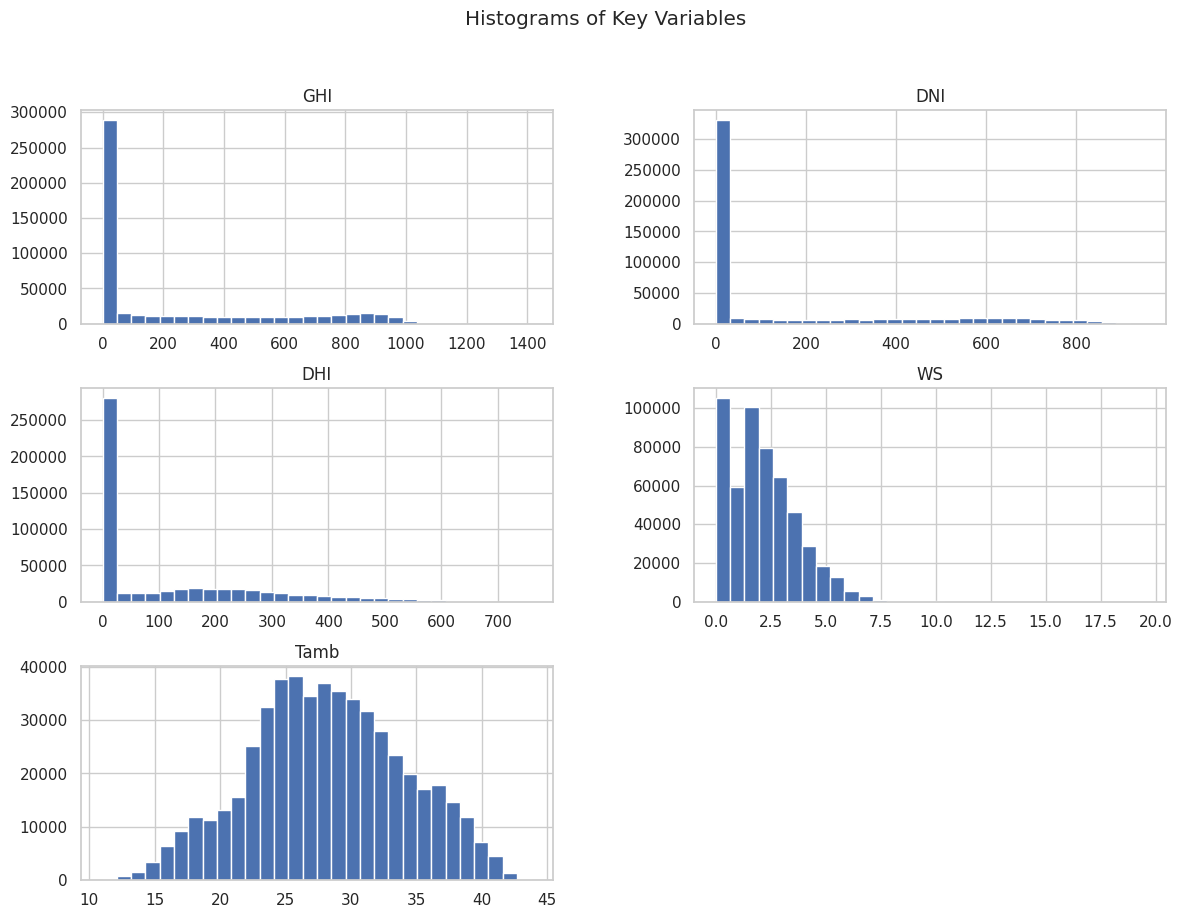

In [12]:
# Histogram of GHI, DNI, DHI, WS, Tamb
data[['GHI', 'DNI', 'DHI', 'WS', 'Tamb']].hist(bins=30, figsize=(14, 10), layout=(3, 2))
plt.suptitle('Histograms of Key Variables')
plt.show()


In [14]:
# Save the cleaned dataset
cleaned_file_path = '/home/kali/Desktop/git/Solar-Radiation-Measurement/data/benin-malanville.csv'
data.to_csv(cleaned_file_path, index=False)
